<font size="3"> 
<b>Example 1.6:</b> <br/><br/>
numpy.random.uniform:  Samples are uniformly distributed over the half-open interval [low, high) <br/>
The probability density function of the uniform distribution is: $p(x)=\frac{1}{b-a}$ <br/>
Anywhere within the interval [a, b), and zero elsewhere.<br/>
mean = $\frac{a + b}{2}$ <br/>
standard deviation = $\sqrt{\frac{(b-a)^2 }{12}}$
</font>

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Define the parameters of the uniform distribution
a = 0 # lower limit
b = 10 # upper limit

# Define the values of N to test
N = [10, 100, 1000, 10000]

# Define the number of repetitions for each N
reps = 1000

# Define an empty list to store the results
results = []

In [95]:
# Loop over the values of N
for n in N:
    # Initialize an empty array to store the means and standard deviations
    means = np.zeros(reps)
    stds = np.zeros(reps)
    # Repeat the experiment reps times
    for i in range(reps):
        # Draw n random numbers from the uniform distribution
        x = np.random.uniform(a, b, n)
        # Calculate the mean and standard deviation of x
        mean = np.mean(x)
        std = np.std(x)
        # Store the results in the array
        means[i] = mean
        stds[i] = std
    # Append the array to the results list
    results.append((means, stds))

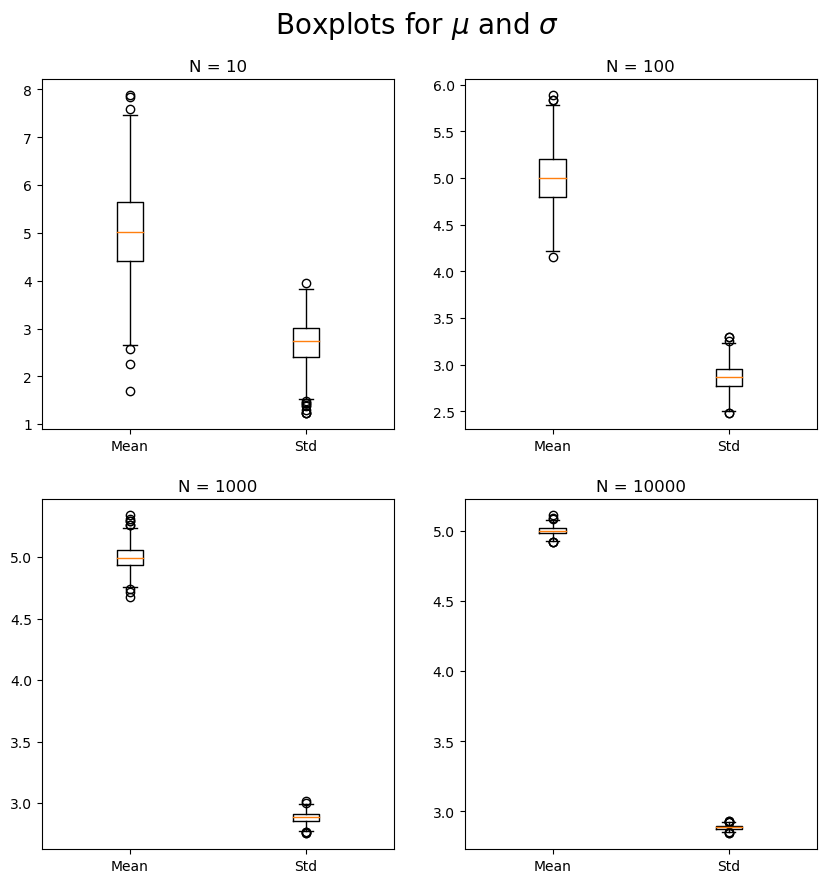

In [96]:
# Plot the results as boxplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for i in range(4):
    ax[i].boxplot(results[i], labels=["Mean", "Std"])
    ax[i].set_title(f"N = {N[i]}")
fig.suptitle("Boxplots for $\mu$ and $\sigma$", x = 0.5, y = 0.95, fontsize = 20)
plt.show()

In [97]:
# To verify the calculated results, we can compare them with the theoretical values of μ and σ. For this example, we have:
mean_analytical = (a + b)/2
std_analytical = np.sqrt( ((b-a)**2 )/12 )
print("Analytically calculated mean:", mean_analytical)
print("Analytically calculated standard deviation:", std_analytical)

Analytically calculated mean: 5.0
Analytically calculated standard deviation: 2.886751345948129


<font size="3"> 
    To test the deviation of the results from each other, we can use a measure such as the coefficient of variation (CV), 
    which is defined as: $\text{CV} = \dfrac{\sigma}{\mu}$ <br/>
    In this example it was necessary to shift the calculated CV values by the theoretical value.<br/><br/>
    The CV is a dimensionless quantity that measures how much variation there is relative to the mean. <br/>
    A lower CV indicates less variation and more consistency.<br/>
    We can calculate the CV for each value of N and plot it as a histogram:
</font>

In [98]:
# Define an empty list to store the CVs
cvs = []
#shift the CVs by the theoretical value
shift  = std_analytical/mean_analytical

# Loop over the results list
for result in results:
    # Extract the means and stds arrays
    means, stds = result
    # Calculate the CVs for each experiment
    cv = stds / means
    # Append the CVs to the cvs list
    cvs.append(cv - shift)

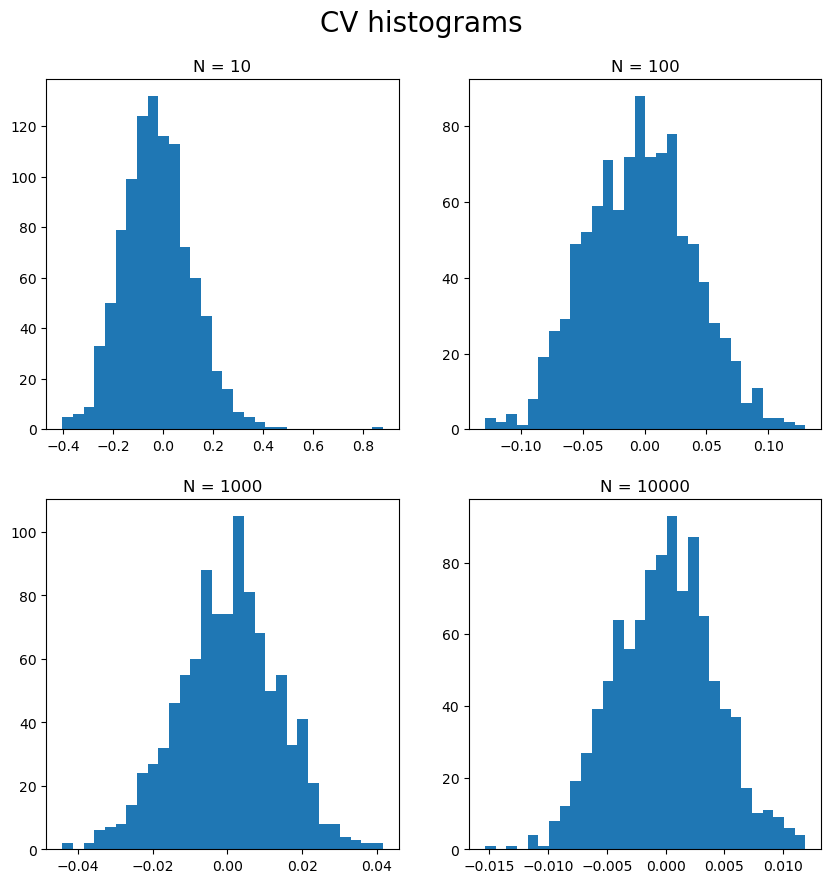

In [99]:
# Plot the CVs as histograms
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# flatten ax (change from (2,2)-array to 1d array with 4 elements) for histogram
ax = ax.flatten()
for i in range(4):
    ax[i].hist(cvs[i], bins=30)
    ax[i].set_title(f"N = {N[i]}")
fig.suptitle("CV histograms", x = 0.5, y = 0.95, fontsize = 20)
plt.show()

<font size="3"> 
 To set a maximum (satisfying) deviation, we can choose a threshold value for the CV that we consider acceptable. 
 f.e. CV < 1% <br/>
    
 We can then check how many experiments satisfy this condition for each value of N:
</font>

In [100]:
# Define a threshold value for CV 
threshold = 0.01

# Initialize a list to store the percentages of satisfying experiments
percentages = []

In [101]:
# Loop over the results list
for i in range(len(results)):
    # Count how many CVs are below the threshold
    count = np.sum(np.abs(cvs[i]) < threshold)
    # Calculate the percentage of satisfying experiments
    percentage = count / reps * 100
    percentages.append(percentage)
    # Print the results
    print(f"For N = {N[i]}, {percentage:.2f}% of the experiments have CV < {threshold}")

For N = 10, 5.60% of the experiments have CV < 0.01
For N = 100, 18.70% of the experiments have CV < 0.01
For N = 1000, 55.00% of the experiments have CV < 0.01
For N = 10000, 98.30% of the experiments have CV < 0.01


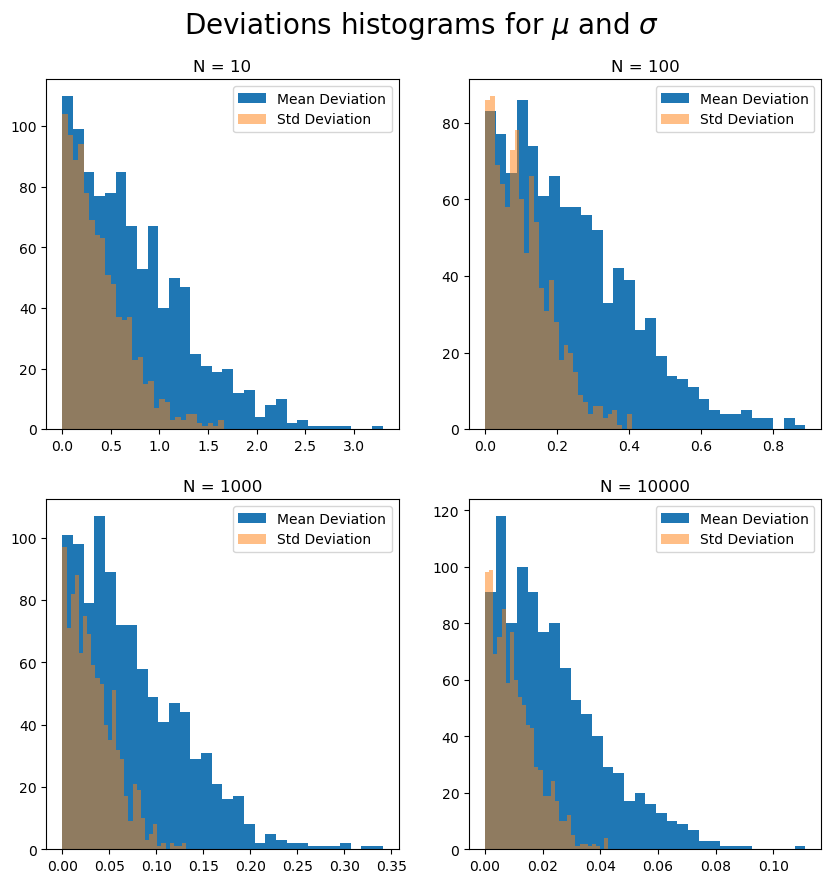

In [102]:
# Calculate deviations from analytical values by my means of list comprehension
deviations_mean = np.abs(np.array([means - mean_analytical for means, _ in results]))
deviations_std = np.abs(np.array([stds - std_analytical for _, stds in results]))

# Plot the deviations as histograms
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# flatten ax (change from (2,2)-array to 1d array with 4 elements) for histogram
ax = ax.flatten()
for i in range(4):
    ax[i].hist(deviations_mean[i], bins=30, label="Mean Deviation")
    ax[i].hist(deviations_std[i], bins=30, alpha=0.5, label="Std Deviation")
    ax[i].set_title(f"N = {N[i]}")
    ax[i].legend()
fig.suptitle("Deviations histograms for $\mu$ and $\sigma$", x = 0.5, y = 0.95, fontsize = 20)
plt.show()